**Covid19 in Turkey**

Inserts libs


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize']= 10, 12
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading Dataset

In [ ]:
df=pd.read_excel('/content/Covid cases in Turkey.xlsx')
df_turkey=df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Turkey National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Adana,2028,0,1,0
1,2,Adıyaman,3,0,0,0
2,3,Afyon,1,0,0,0
3,4,Ağrı,30,1,3,1
4,5,Amasya,32,1,4,1
...,...,...,...,...,...,...
76,77,Yalova,491,13,23,1
77,78,Karabük,23,0,2,0
78,79,Kilis,35,2,5,1
79,80,Osmaniye,34,2,3,0


In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Turkey National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across Turkey till date :', total_cases)

KeyError: ignored

In [ ]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Turkey National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Adana,2028,0,1,0,2028
1,Adıyaman,3,0,0,0,3
2,Afyon,1,0,0,0,1
3,Ağrı,30,1,3,1,31
4,Amasya,32,1,4,1,33
5,Ankara,2500,14,45,4,2514
6,Antalya,102,0,23,1,102
7,Artvin,41,0,4,1,41
8,Aydın,43,8,4,0,51
9,Balıkesir,35,0,3,0,35


Total Active

In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across Turkey:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across Turkey: 19239


,Total Active
Name of State / UT,
İstanbul,3070
Ankara,2465
İzmir,2188
Adana,2027
Kocaeli,1702
Konya,1652
Bursa,1540
Sakarya,1003
Isparta,602


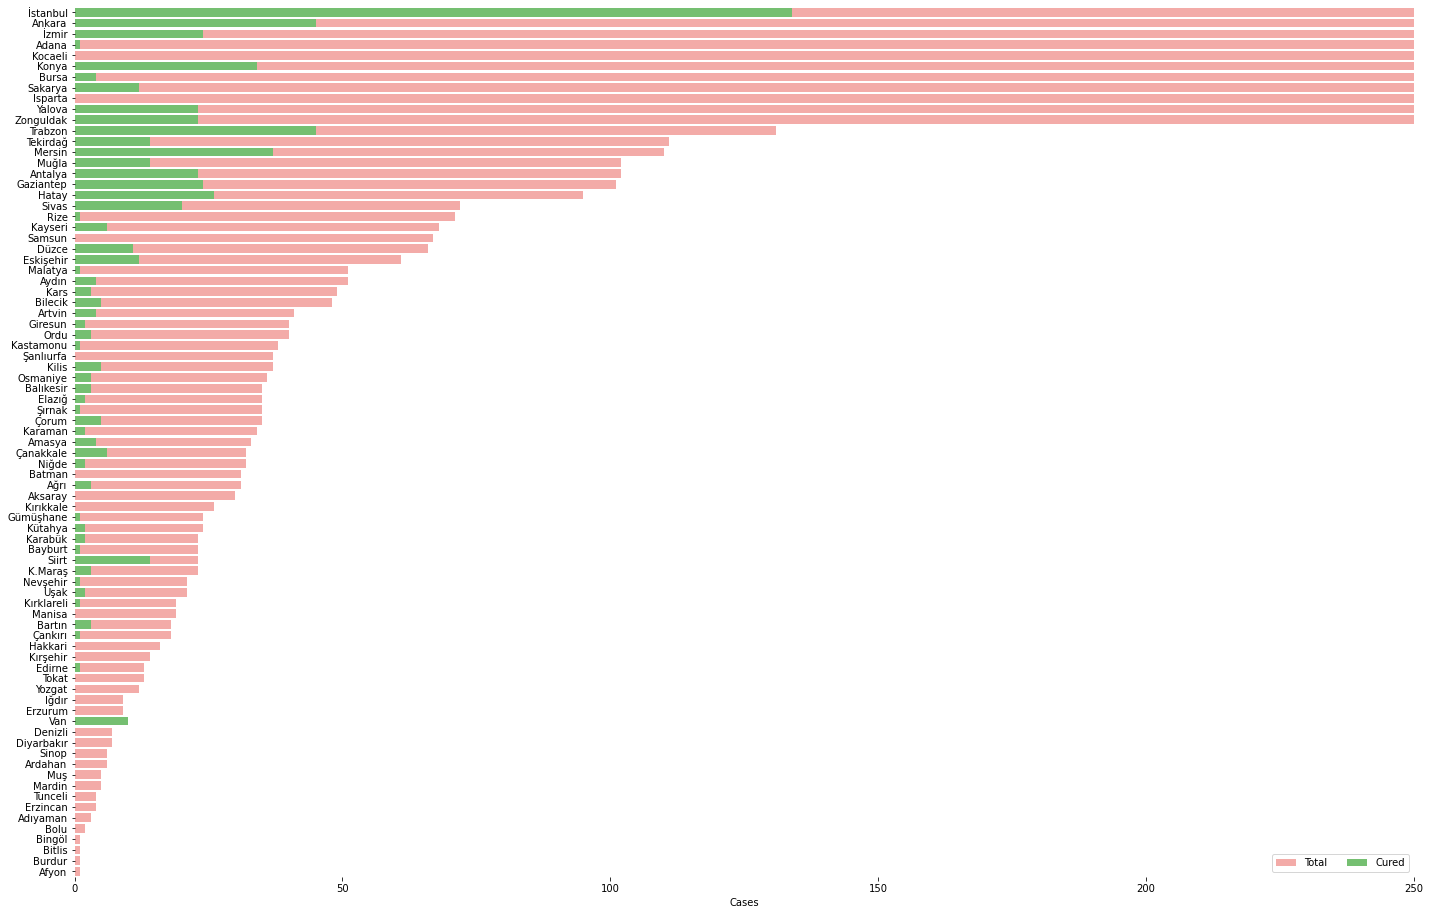

In [ ]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(24, 16))
data = df[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 250), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [ ]:
import plotly 
plotly.io.renderers.default= 'colab'

In [ ]:
dbd_Turkey=pd.read_excel('/content/per_day_cases.xlsx')
dbd_turkey=df.copy()


In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Turkey['Date'], y = dbd_Turkey['Total Cases'], mode='lines + markers',name='Total Cases',marker = dict(color = 'rgba(16, 112, 2, 0.8)')))
fig.add_trace(go.Scatter(x=dbd_Turkey['Date'], y = dbd_Turkey['Deaths'], mode='lines + markers',name='Deaths',marker = dict(color = 'rgba(255, 128, 2, 0.8)')))
fig.update_layout(title_text='Trend of Coronavirus Cases in Turkey (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)',xaxis= dict(title= 'Dates',ticklen= 5,zeroline= True))
fig.show()



import plotly.express as px
fig = px.bar(dbd_Turkey, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Turkey on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
# import plotly.express as px
fig = px.bar(dbd_Turkey, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Turkey', color_discrete_sequence = px.colors.cyclical.IceFire)


fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Prediction


In [ ]:
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df.query('Country=="Turkey"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,192.0,3.0,0.0
58,2020-03-20,359.0,4.0,0.0
59,2020-03-21,670.0,9.0,0.0
60,2020-03-22,1236.0,30.0,0.0


In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()



fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

Growth Factor

In [ ]:
k =df_confirmed[df_confirmed['Country']=='Turkey'].loc[:,'3/22/20':]
turkey_confirmed = k.values.tolist()[0] 


growth_diff = []

for i in range(1,len(turkey_confirmed)):
    growth_diff.append(turkey_confirmed[i] / turkey_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff) 
print('Average growth factor',growth_factor)

Average growth factor 1.2306923216942773


In [ ]:
from fbprophet import Prophet


In [ ]:
confirmed.columns = ['ds','y']

confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
71,2020-04-02
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2020-04-02,462292.324110,436974.523968,489950.427753
72,2020-04-03,479390.778074,452586.983958,509286.773298
73,2020-04-04,495830.415278,467364.429170,527979.010259
74,2020-04-05,512463.405811,479368.878009,547911.118725
75,2020-04-06,525685.099602,491592.364583,560825.697793


World Wide Forecast Grahp

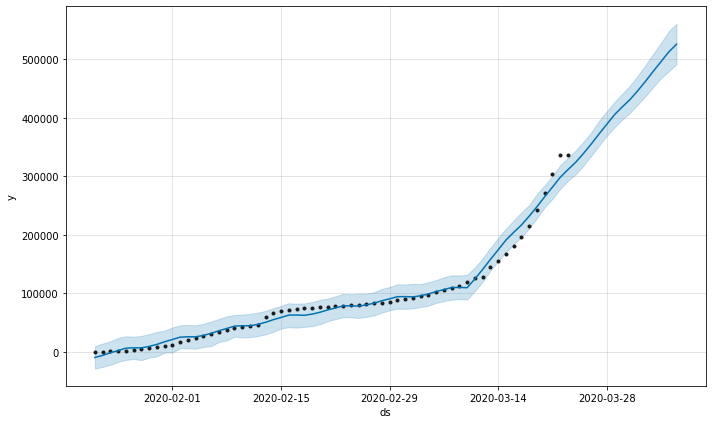

In [ ]:
confirmed_forecast_plot = m.plot(forecast)